<a href="https://colab.research.google.com/github/kalai2315/Machine-Learning/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
from sklearn import datasets

In [3]:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_arff_parser',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circl

In [4]:
from sklearn.datasets import load_digits

In [5]:
digits = load_digits()

In [6]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [7]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [8]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

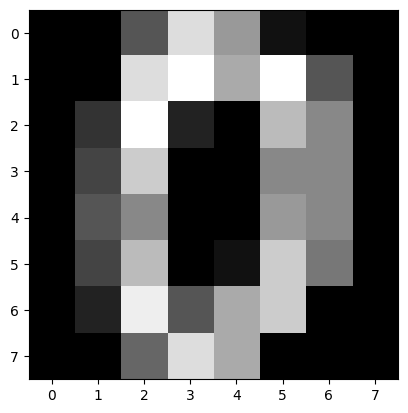

In [9]:
plt.imshow(digits.images[0],cmap=plt.cm.gray)

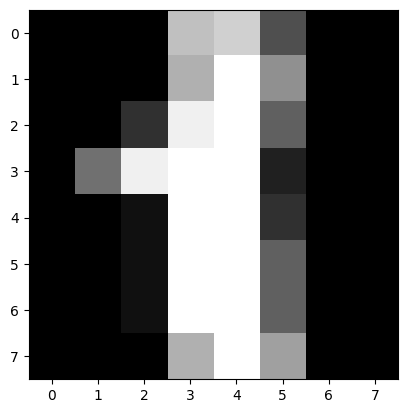

In [10]:
plt.imshow(digits.images[1],cmap=plt.cm.gray)

In [11]:
x = pd.DataFrame(digits.data)

In [12]:
x

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [13]:
y = pd.DataFrame(digits.target)
y

,0
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [14]:
#statndardizing the data

from sklearn.preprocessing import StandardScaler

In [15]:
x_standard = StandardScaler().fit_transform(x)
x_standard

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [16]:
x_standard.shape

(1797, 64)

In [17]:
x1 = x_standard.T
x1

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.33501649, -0.33501649, -0.33501649, ..., -0.33501649,
        -0.33501649, -0.33501649],
       [-0.04308102, -1.09493684, -1.09493684, ..., -0.88456568,
        -0.67419451,  1.00877481],
       ...,
       [-1.14664746,  0.54856067,  1.56568555, ..., -0.12952258,
         0.8876023 ,  0.8876023 ],
       [-0.5056698 , -0.5056698 ,  1.6951369 , ..., -0.5056698 ,
        -0.5056698 , -0.26113572],
       [-0.19600752, -0.19600752, -0.19600752, ..., -0.19600752,
        -0.19600752, -0.19600752]])

In [18]:
x1.shape

(64, 1797)

In [19]:
cov_mat = np.cov(x1)
cov_mat

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.00055679,  0.55692803, ..., -0.02988686,
         0.02656195, -0.04391324],
       [ 0.        ,  0.55692803,  1.00055679, ..., -0.04120565,
         0.07263924,  0.08256908],
       ...,
       [ 0.        , -0.02988686, -0.04120565, ...,  1.00055679,
         0.64868875,  0.26213704],
       [ 0.        ,  0.02656195,  0.07263924, ...,  0.64868875,
         1.00055679,  0.62077355],
       [ 0.        , -0.04391324,  0.08256908, ...,  0.26213704,
         0.62077355,  1.00055679]])

In [20]:
min_cov = np.min(cov_mat[np.nonzero(cov_mat)])

In [21]:
min_cov

-0.57051363323811

In [22]:
from numpy.linalg import eig

In [23]:
eigenvalues, eigenvectors = eig(cov_mat)

# Display results
print("Covariance Matrix:\n", cov_mat)
print("Eigenvalues:\n", eigenvalues)
print("Number of Eigenvalues:", len(eigenvalues))

Covariance Matrix:
 [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.00055679  0.55692803 ... -0.02988686  0.02656195
  -0.04391324]
 [ 0.          0.55692803  1.00055679 ... -0.04120565  0.07263924
   0.08256908]
 ...
 [ 0.         -0.02988686 -0.04120565 ...  1.00055679  0.64868875
   0.26213704]
 [ 0.          0.02656195  0.07263924 ...  0.64868875  1.00055679
   0.62077355]
 [ 0.         -0.04391324  0.08256908 ...  0.26213704  0.62077355
   1.00055679]]
Eigenvalues:
 [7.34477606 5.83549054 5.15396118 3.96623597 2.9663452  2.57204442
 2.40600941 2.06867355 1.82993314 1.78951739 1.69784616 1.57287889
 1.38870781 1.35933609 1.32152536 1.16829176 1.08368678 0.99977862
 0.97438293 0.90891242 0.82271926 0.77631014 0.71155675 0.64552365
 0.59527399 0.5765018  0.52673155 0.5106363  0.48686381 0.45560107
 0.44285155 0.42230086 0.3991063  0.39110111 0.36094517 0.34860306
 0.3195963  0.05037444 0.29406627 0.27692285 0.06328961 0.258273
 0.24783029 0.2

In [26]:
len(eigenvalues)

64

In [28]:
total = sum(eigenvalues)
total

61.03396436525629

In [30]:
#Create eigenpairs
eigenpairs = [(eigenvalues[i], eigenvectors[:, i]) for i in range(len(eigenvalues))]

In [32]:
#Calculate explained variance
explained_variance = eigenvalues / np.sum(eigenvalues)

In [33]:
#Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

In [34]:
# Display results
print("Eigenpairs (Eigenvalue, Eigenvector):")
for eigenvalue, eigenvector in eigenpairs:
    print(f"Eigenvalue: {eigenvalue:.4f}, Eigenvector: {eigenvector}")

print("\nExplained Variance:")
print(explained_variance)

print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)

# Maximum cumulative explained variance
max_cumulative_explained_variance = cumulative_explained_variance[-1]
print("\nMaximum Cumulative Explained Variance:", max_cumulative_explained_variance)

Eigenpairs (Eigenvalue, Eigenvector):
Eigenvalue: 7.3448, Eigenvector: [ 0.          0.18223392  0.285868    0.22036967 -0.02516956 -0.00949725
 -0.0524765  -0.06269499  0.03470727  0.24553368  0.22915174 -0.10794381
  0.03620209  0.03871159 -0.08378077 -0.09277502  0.01669934  0.1367165
 -0.06305075 -0.12287927  0.14819348 -0.02348425 -0.1711997  -0.10420837
 -0.00394882 -0.1163897  -0.18820473  0.0658604   0.14353257 -0.12820705
 -0.18062075 -0.05270917  0.         -0.23890251 -0.23500613 -0.00509137
 -0.01310881 -0.15911618 -0.12939416  0.         -0.05559906 -0.18715707
 -0.15353371 -0.04682572 -0.11089272 -0.10720947  0.01792652 -0.00227271
 -0.02881729  0.040868    0.11027068  0.0318244  -0.07904945  0.06832147
  0.12124707  0.04877119 -0.00183586  0.16039569  0.27985301  0.19444929
  0.01777381  0.103198    0.1198106   0.07149362]
Eigenvalue: 5.8355, Eigenvector: [ 0.         -0.04702701 -0.0595648   0.02080385 -0.15590316 -0.27413299
 -0.24973251 -0.14583207  0.00102721 -0.0276

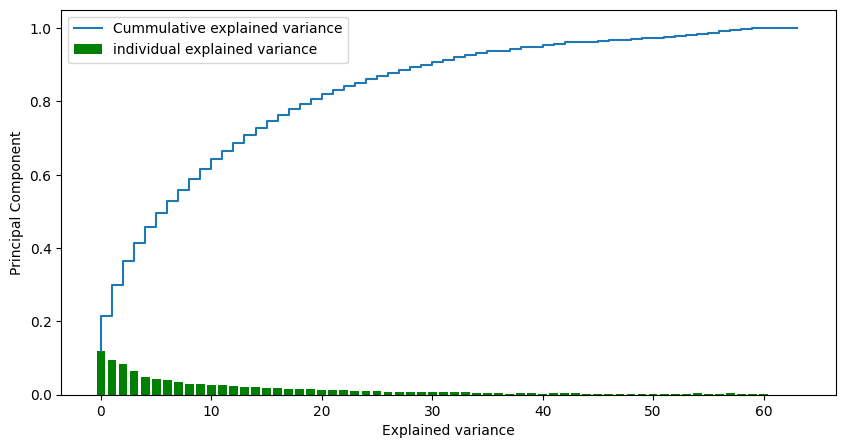

In [36]:
#scree plot

plt.figure(figsize = (10,5))
plt.bar(range(len(explained_variance)),explained_variance,label="individual explained variance",color="g")
plt.step(range(len(cumulative_explained_variance)),cumulative_explained_variance,label="Cummulative explained variance")
plt.xlabel("Explained variance")
plt.ylabel("Principal Component")
plt.legend()
plt.show()

In [44]:
pca = PCA()
pca.fit(x_standard)

PCA()

In [45]:
#Compute explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

In [46]:
# Display the explained variance ratio
print("Explained Variance Ratio:")
print(explained_variance_ratio)

# Maximum explained variance ratio
max_explained_variance_ratio = np.max(explained_variance_ratio)
print("\nMaximum Explained Variance Ratio:", max_explained_variance_ratio)

Explained Variance Ratio:
[0.12033916 0.09561054 0.08444415 0.06498408 0.04860155 0.0421412
 0.03942083 0.03389381 0.02998221 0.02932003 0.02781805 0.02577055
 0.02275303 0.0222718  0.02165229 0.01914167 0.01775547 0.01638069
 0.0159646  0.01489191 0.0134797  0.01271931 0.01165837 0.01057647
 0.00975316 0.00944559 0.00863014 0.00836643 0.00797693 0.00746471
 0.00725582 0.00691911 0.00653909 0.00640793 0.00591384 0.00571162
 0.00523637 0.00481808 0.00453719 0.00423163 0.00406053 0.00397085
 0.00356493 0.00340787 0.00327835 0.00311032 0.00288575 0.00276489
 0.00259175 0.00234483 0.00218257 0.00203598 0.00195512 0.00183318
 0.00167946 0.00161236 0.00147763 0.00135118 0.00125101 0.00103696
 0.00082535 0.         0.         0.        ]

Maximum Explained Variance Ratio: 0.12033916097734901


In [37]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x_standard,y,train_size=0.8)

In [40]:
x_train.shape

(1437, 64)

**Dimension Reduction**

In [41]:
from sklearn.decomposition import PCA

In [42]:
# pca = PCA(n_components = 40)
pca = PCA(0.90)
pca_x_train = pca.fit_transform(x_train)
pca_x_test = pca.transform(x_test)

In [43]:
pca_x_train.shape

(1437, 31)

In [48]:
df=pd.read_csv("/content/GYM.csv")
df

,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,4,0,0,71.76,0,0,8,17
1,45,4,0,0,71.76,0,0,8,17
2,40,4,0,0,71.76,0,0,8,17
3,44,4,0,0,71.76,0,0,8,17
4,45,4,0,0,71.76,0,0,8,17
...,...,...,...,...,...,...,...,...,...
62179,23,5,1,0,61.07,0,1,3,18
62180,21,5,1,0,61.07,0,1,3,18
62181,25,5,1,0,56.71,0,1,3,19
62182,18,5,1,0,56.71,0,1,3,19


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   day_of_week           62184 non-null  int64  
 2   is_weekend            62184 non-null  int64  
 3   is_holiday            62184 non-null  int64  
 4   temperature           62184 non-null  float64
 5   is_start_of_semester  62184 non-null  int64  
 6   is_during_semester    62184 non-null  int64  
 7   month                 62184 non-null  int64  
 8   hour                  62184 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.3 MB


In [50]:
features = df.select_dtypes(include=[np.number]).values

In [51]:
features

array([[37.,  4.,  0., ...,  0.,  8., 17.],
       [45.,  4.,  0., ...,  0.,  8., 17.],
       [40.,  4.,  0., ...,  0.,  8., 17.],
       ...,
       [25.,  5.,  1., ...,  1.,  3., 19.],
       [18.,  5.,  1., ...,  1.,  3., 19.],
       [23.,  5.,  1., ...,  1.,  3., 19.]])

In [52]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [53]:
# Apply PCA
pca = PCA()
pca.fit(scaled_features)

PCA()

In [54]:
#Calculate explained variance ratio and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

In [55]:
#Find the minimum number of components for 99% variance
n_components_99 = np.argmax(cumulative_variance >= 0.99) + 1  # +1 because index starts at 0#

In [56]:
n_components_99

9

In [57]:
#Apply PCA with n_components=2
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(scaled_features)

In [58]:
#Inverse transform to get the approximated original data
approx_original_data = pca.inverse_transform(pca_transformed)

In [60]:
#Calculate the sum of variances
original_variance_sum = np.sum(np.var(scaled_features, axis=0))
approx_variance_sum = np.sum(np.var(approx_original_data, axis=0))
print(f'Original variance sum: {original_variance_sum}')
print(f'Approximated variance sum: {approx_variance_sum}')

Original variance sum: 9.0
Approximated variance sum: 3.781516862012496


In [61]:
print("Difference in sum of variance:", original_variance_sum - approx_variance_sum)

Difference in sum of variance: 5.218483137987504


Find the sum of eigenvalues calculated for the first 8 records(gym.csv) with the independent features?

In [62]:
#Compute the covariance matrix
covariance_matrix = np.cov(scaled_features, rowvar=False)

In [63]:
#Calculate eigenvalues
eigenvalues, _ = np.linalg.eig(covariance_matrix)

In [64]:
#Sum the eigenvalues
sum_of_eigenvalues = np.sum(eigenvalues)

In [65]:
print("Sum of eigenvalues for the first 8 records:", sum_of_eigenvalues)

Sum of eigenvalues for the first 8 records: 9.00014473409132


In [66]:

X = df.iloc[:, :-1].select_dtypes(include=[np.number])  # Independent features
y = df.iloc[:, -1]  # Dependent variable

In [67]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)


In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [70]:
# Model 1: Raw Data
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred1))

In [71]:
# Model 2: PCA
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
# Apply PCA
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [73]:
# Fit Linear Regression on PCA-transformed data
model2 = LinearRegression()
model2.fit(X_train_pca, y_train)
y_pred2 = model2.predict(X_test_pca)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))

In [74]:
print("RMSE of Model 1 (Raw Data):", rmse1)
print("RMSE of Model 2 (PCA):", rmse2)

RMSE of Model 1 (Raw Data): 5.439104717333018
RMSE of Model 2 (PCA): 6.201957223070615


In [75]:
# Compare performances
if rmse2 < rmse1:
    performance_comparison = "Model 2 performance is better than Model 1"
elif rmse2 == rmse1:
    performance_comparison = "No change in performance"
else:
    performance_comparison = "Model 2 performance is not better than Model 1"

print(performance_comparison)

Model 2 performance is not better than Model 1


In [77]:
numeric_features = df.select_dtypes(include=[np.number])

In [78]:
#Compute the correlation matrix
correlation_matrix = numeric_features.corr()

In [79]:
#Find the minimum correlation value (excluding self-correlation)
min_correlation = correlation_matrix.values[np.triu_indices_from(correlation_matrix, k=1)].min()


In [80]:
min_correlation

-0.1739578122762517